In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def rand_tall_med_r_2(amont, low=0.0, high=1.0):
    """
    Generate two arrays of random points within a specified range.

    Parameters:
        amont (int): Number of random points to generate.
        low (float): Lower limit of the random range.
        high (float): Upper limit of the random range.

    Returns:
        tuple: 3 numpy arrays of shape (amont) and 1 numpy arrays of shape (100 times smaler then boxs).
    """
    delta_r = high - low  # delta for radius
    r = np.round(np.random.uniform(0, delta_r / 100, size=amont))
    x ,y, z = [],[],[]
    print(r)
    for i in r:
        print(i)
        x.append(np.round(np.random.uniform(low+i, high-i)))
        y.append(np.round(np.random.uniform(low+i, high-i)))
        z.append(np.round(np.random.uniform(low+i, high-i)))
    return np.array([r,x,y,z]).T

box = 1000
x1 = rand_tall_med_r_2(amont=10, low=0.0, high=box)
print(x1)

[4. 3. 9. 6. 7. 6. 9. 7. 7. 3.]
4.0
3.0
9.0
6.0
7.0
6.0
9.0
7.0
7.0
3.0
[[  4. 471. 967. 105.]
 [  3. 546. 319. 639.]
 [  9. 175.  92. 706.]
 [  6.  40.  65. 776.]
 [  7. 144. 953. 867.]
 [  6. 519. 149. 296.]
 [  9. 611.  54. 772.]
 [  7. 214. 412. 817.]
 [  7. 414. 945. 320.]
 [  3. 533. 809. 736.]]


In [3]:
def make_points(numb_1, low=0.0, high=1.0):
    """
    Generate two arrays of random points within a specified range.

    Parameters:
        numb_1 (int): Number of random points to generate.
        low (float): Lower limit of the random range.
        high (float): Upper limit of the random range.

    Returns:
        tuple: 3 numpy arrays of shape (numb_1)
    """
    x = np.random.uniform(low, high, numb_1)
    y = np.random.uniform(low, high, numb_1)
    z = np.random.uniform(low, high, numb_1)

    return np.round(np.array([x,y,z]).T)



In [4]:
def in_circle(point, sphere):
    """
      testing it a point is in the sphere

      Parameters:
          point (int): list[x,y,z] cordenets
          sphere (int): list of sphere [r,x,y,z]

      Returns:
          true if in the sphere
      """

    return ((sphere[1]-point[0]) ** 2) + ((sphere[2]-point[1]) ** 2) + ((sphere[3]-point[2]) ** 2) < sphere[0]**2

sphere = [5,10,10,10]
point = [6,10,10]
in_circle(point,sphere)

True

In [5]:
def rand_tall_med_r(amont, low=0.0, high=1.0, r_size = 100):
    """
    Generate two arrays of random points within a specified range.

    Parameters:
        amont (int): Number of random points to generate.
        low (float): Lower limit of the random range.
        high (float): Upper limit of the random range.

    Returns:
        tuple: 3 numpy arrays of shape (amont) and 1 numpy arrays of shape (100 times smaler then boxs).
    """
    delta_r = high - low  # delta for radius
    r = np.round(np.random.uniform(0, delta_r / r_size, size=amont))

    x ,y, z = [],[],[]
    for i in r:
        x.append(np.round(np.random.uniform(low+i, high-i)))
        y.append(np.round(np.random.uniform(low+i, high-i)))
        z.append(np.round(np.random.uniform(low+i, high-i)))
    return np.array([r,x,y,z]).T

point_test = rand_tall_med_r(2 , 0, 10)
print(point_test)


[[0. 8. 4. 4.]
 [0. 8. 5. 3.]]


In [6]:
def plot_sphere(sphere):
    """
    Generate two arrays of random points within a specified range.

    Parameters:
        tuple: i x j marix
        i = amont of sphere
        j = r,x,y,z

    Returns:
        :returns x y z point for all sphere
    """
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    u, v = np.meshgrid(u, v)

    x_sphere,y_sphere,z_sphere = [],[],[]
    for i in range(len(sphere)):
        x_sphere.append(sphere[i,1] + sphere[i,0] * np.sin(v) * np.cos(u))
        y_sphere.append(sphere[i,2] + sphere[i,0] * np.sin(v) * np.sin(u))
        z_sphere.append(sphere[i,3] + sphere[i,0] * np.cos(v))
    return x_sphere,y_sphere,z_sphere

7824 / 100000 = 0.07824
[708.  21. 775.  50. 385. 465. 720.  84. 356. 126.]


ValueError: x and y can be no greater than 2D, but have shapes (10, 100, 100) and (10, 100, 100)

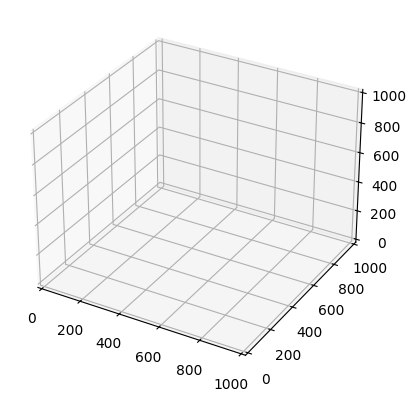

In [7]:

amount_sphere = 10
amount_points = 100000

sphere_test = rand_tall_med_r(amount_sphere , 0, 1000,5)
x_sphere, y_sphere ,z_sphere = plot_sphere(sphere_test)


point_test = make_points(amount_points,1,1000)


volum = []
x_point,y_point,z_point = [],[],[]
point_in = 0
for i in range(len(sphere_test)):
    volum.append(sphere_test[i,0]*4*np.pi/3)
    for j in range(len(point_test)):
        if in_circle(point_test[j,:], sphere_test[i,:]):
            point_in += 1
            x_point.append(point_test[j,0])
            y_point.append(point_test[j,1])
            z_point.append(point_test[j,2])
            point_test[j,:] = [0,0,0]
print( point_in,'/',amount_points,'=',point_in/amount_points)
print(np.round(volum))



fig = plt.figure()

ax = fig.add_subplot(projection="3d")
ax.set_xlim(0,1000)
ax.set_ylim(0,1000)
ax.set_zlim(0,1000)

ax.plot(x_sphere,y_sphere,z_sphere,'.r')
ax.plot(x_point,y_point,z_point,'.b')
plt.show()




